In [22]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *

np.random.seed(42)
num_average_time = 3  # Number of times to run each experiment to calculate the average values

In [23]:
# Function to create fake data (take inspiration from usage.py)
# ...
def RealReal(N,M):
    X = pd.DataFrame(np.random.randn(N, M))
    y = pd.Series(np.random.randn(N))
    return X,y
def RealDiscrete(N,M):
    X = pd.DataFrame(np.random.randn(N, M))
    y = pd.Series(np.random.randint(2, size=N), dtype="category")
    return X,y
def DiscreteDiscrete(N,M):
    X = pd.DataFrame({i: pd.Series(np.random.randint(2, size=N), dtype="category") for i in range(M)})
    y = pd.Series(np.random.randint(2, size=N), dtype="category")
    return X,y
def DiscreteReal(N,M):
    X = pd.DataFrame({i: pd.Series(np.random.randint(2, size=N), dtype="category") for i in range(M)})
    y = pd.Series(np.random.randn(N))
    return X,y

In [24]:
# Function to calculate average time (and std) taken by fit() and predict() for different N and P for 4 different cases of DTs
# ...
def time_taken(num_average_time, n_samples_list, n_features_list):
    results = []
    for N in n_samples_list:
        for M in n_features_list:
            types = [
                ("Real_input_Real_output", RealReal),
                ("Real_input_Discrete_output", RealDiscrete),
                ("Discrete_input_Discrete_output", DiscreteDiscrete),
                ("Discrete_input_Real_output", DiscreteReal),
            ]          
            for type_name, data_create_type in types:
                learn_time = []
                predict_time = []
                
                for k in range(num_average_time):
                    X, y = data_create_type(N, M)
                    decisiontree = DecisionTree(criterion="information_gain")

                    start_time = time.time()
                    decisiontree.fit(X, y,0)
                    learn_time.append(time.time() - start_time)

                    start_time = time.time()
                    decisiontree.predict(X)
                    predict_time.append(time.time() - start_time)

                avg_learn_time = np.mean(learn_time)
                avg_predict_time = np.mean(predict_time)
                
                results.append({
                    "N": N,
                    "M": M,
                    "Type": type_name,
                    "Average Learn Time (s)": avg_learn_time,
                    "Average Predict Time (s)": avg_predict_time,
                })
    
    return pd.DataFrame(results)

In [25]:
n_samples_list = [5, 10, 6, 7]  
n_features_list = [3, 7, 4]  

results_df = time_taken(num_average_time, n_samples_list, n_features_list)
print(results_df)

     N  M                            Type  Average Learn Time (s)  \
0    5  3          Real_input_Real_output                0.038366   
1    5  3      Real_input_Discrete_output                0.053528   
2    5  3  Discrete_input_Discrete_output                0.016546   
3    5  3      Discrete_input_Real_output                0.017062   
4    5  7          Real_input_Real_output                0.057482   
5    5  7      Real_input_Discrete_output                0.056822   
6    5  7  Discrete_input_Discrete_output                0.033247   
7    5  7      Discrete_input_Real_output                0.028453   
8    5  4          Real_input_Real_output                0.067610   
9    5  4      Real_input_Discrete_output                0.099862   
10   5  4  Discrete_input_Discrete_output                0.047929   
11   5  4      Discrete_input_Real_output                0.018822   
12  10  3          Real_input_Real_output                0.087564   
13  10  3      Real_input_Discrete

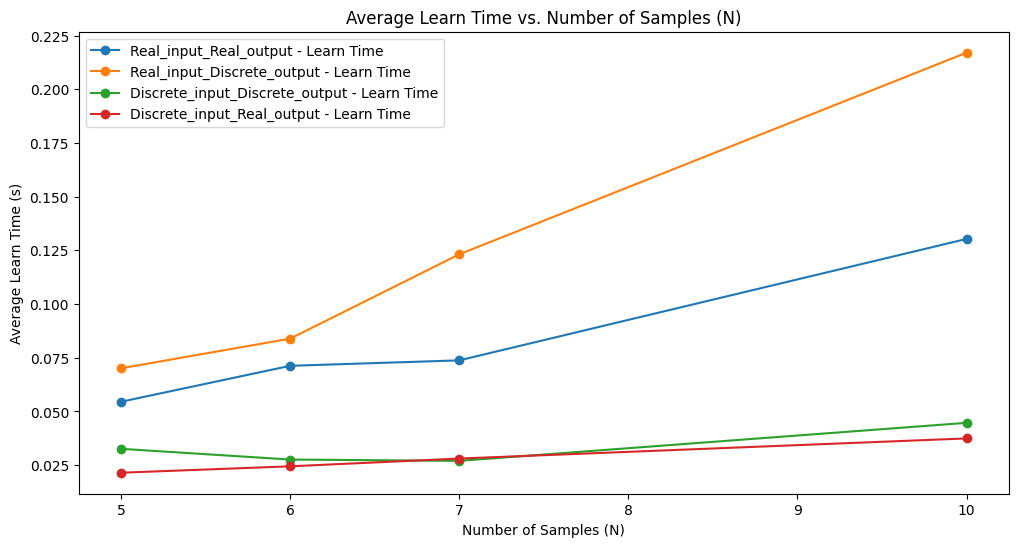

In [28]:
# Function to plot the results
# ...
def plot_learning_time(results_df):
    plt.figure(figsize=(12, 6))
    for data_type in results_df["Type"].unique():
        subset1 = results_df[results_df["Type"] == data_type]
        numeric_subset1 = subset1[['N', 'Average Learn Time (s)']]
        grouped_df1 = numeric_subset1.groupby('N', as_index=False).mean()
        plt.plot(grouped_df1["N"], grouped_df1["Average Learn Time (s)"], label=f"{data_type} - Learn Time", marker='o')

    plt.title("Average Learn Time vs. Number of Samples (N)")
    plt.xlabel("Number of Samples (N)")
    plt.ylabel("Average Learn Time (s)")
    plt.legend()
    plt.show()

# Other functions
# ...
# Run the functions, Learn the DTs and Show the results/plots
plot_learning_time(results_df)

##  Time Complexity of Decision Trees for learning

### 1. Theoritical

  - **Best Case:** `O(N * M * log(N))`
    - In the optimal case the depth of tree will be log(N), and if there are M features then at each level we need to check which is best feature. If input is real then we need to also check the splits and at each feature and there are N splits possible. So at each level time complexity is O(N*M) and for complete decision tree it becomes O(N * M * log(N)).
  - **Worst Case:** `O(N * M * N)`
    - This occurs when the tree grows to its maximum depth, which happens if the splits are nearly equal at each node. The complexity arises from evaluating every feature and split point at each node. In this case there are N levels and at each level it takes O(N * M), so overall time complecity becomes O(N * M * N).

### 2. Experimental

- From the plot, we can observe that as the no. of samples increses learning time also increases,this is because the N in the time complexity increases.

- Along with that it can be also noticed that the learning time in case of real inputs is much higher than that of discrete inputs.This is because we need to additionally check best split at each feature in case of real inputs, whereas for dicrete input we only check feature.

- From the plot it can be observed that the learning time of direte output is higher than that of real output. This may be because real output involves minimizing mean squared error (MSE), which can be relatively straightforward once the splits are determined. Discrete outputs involves computing class distributions and handling categorical splits and how well each split separates the classes.


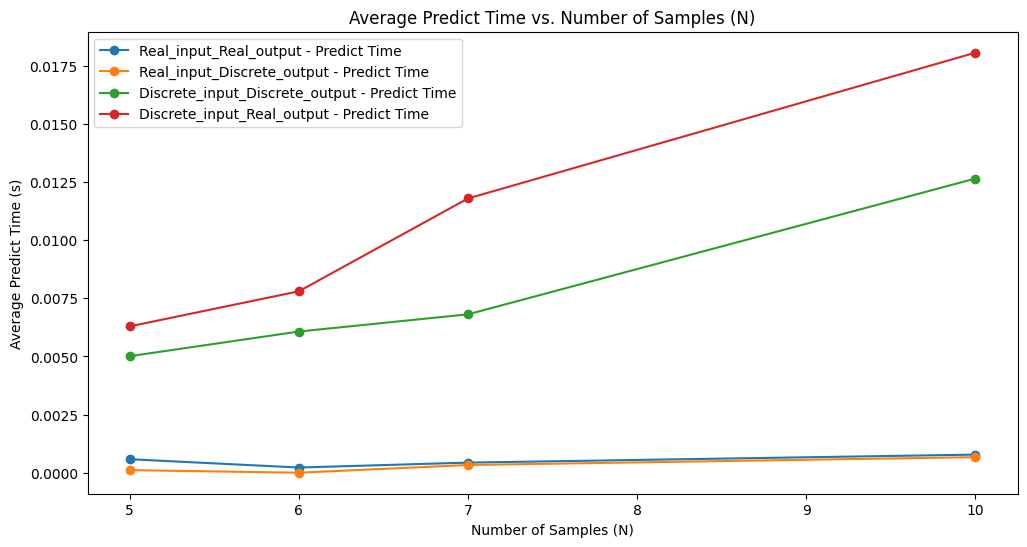

In [27]:
def plot_predicting_time(results_df):
    plt.figure(figsize=(12, 6))
    for data_type in results_df["Type"].unique():
        subset2 = results_df[results_df["Type"] == data_type]
        numeric_subset2 = subset2[['N', 'Average Predict Time (s)']]
        grouped_df2 = numeric_subset2.groupby('N', as_index=False).mean()
        plt.plot(grouped_df2["N"], grouped_df2["Average Predict Time (s)"], label=f"{data_type} - Predict Time", marker='o')

    plt.title("Average Predict Time vs. Number of Samples (N)")
    plt.xlabel("Number of Samples (N)")
    plt.ylabel("Average Predict Time (s)")
    plt.legend()
    plt.show()

# Other functions
# ...
# Run the functions, Learn the DTs and Show the results/plots
plot_predicting_time(results_df)

##  Time Complexity of Decision Trees for predicting

### 1. Theoritical

  - **Best Case:** `O(log(N))`
    - In the optimal case the depth of tree will be log(N),and we can predict which way to go in O(1) once decision tree is built.So it takes O(log(N)).
  - **Worst Case:** `O(N)`
    - This occurs when the decision tree is highly unbalanced where each node has only one child. This would require traversing all the way from the root to the deepest leaf node, which could involve n steps if the tree has n nodes. So time complexity in such case becomes O(N).

### 2. Experimental

- From the plot we can observe it is similar to that of learning time. Time taken increses as no. of sample increases, time taken by real input is much more than discrete input and time taken by discrete output is more than real output.

- The difference in time taken for learning and predicting can be also observed form th plots. The time taken for predicting is significantly lesser than that of learning. 